In [207]:
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio


In [208]:
point = np.array([80,150])

start = 100
end = 1000
start_mlda = 100
end_mlda = 2000

sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_3_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_3_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_3_l2.h5']

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'] ))
    fin.close()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_1_mlda.h5')
mlda_samples = np.array( fin['/samples'] )
fin.close()


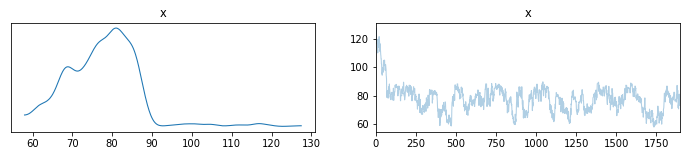

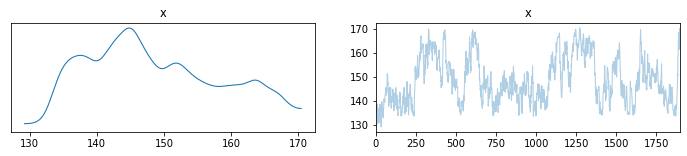

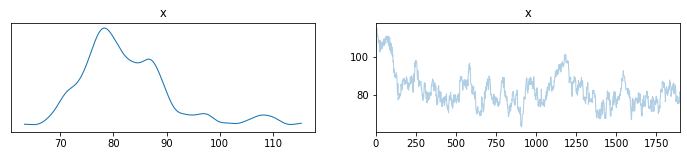

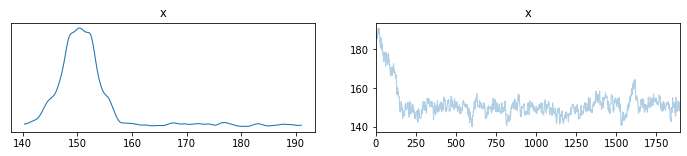

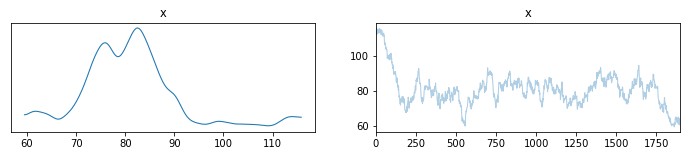

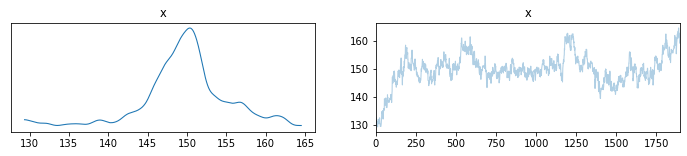

In [209]:
for i in range(len(sample_paths)):
    s = samples[i]
    az.plot_trace(s[0,start:])
    az.plot_trace(s[1,start:])

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

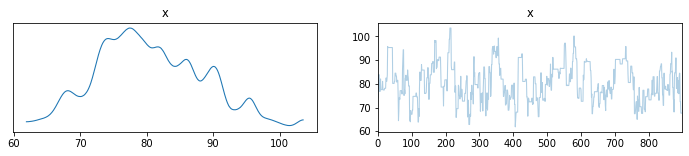

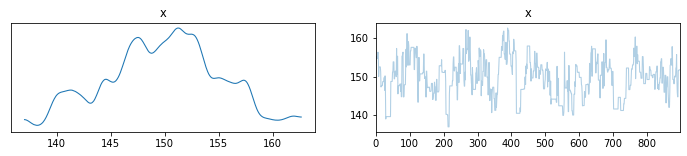

In [210]:
az.plot_trace(mlda_samples[0,start_mlda:])
az.plot_trace(mlda_samples[1,start_mlda:])

In [211]:
for i in range(len(sample_paths)):
    print("Level " + str(i) + ":")
    mean = np.mean(samples[i][:,start:end], axis=1)
    print("Mean = " + str(mean))
    print("DLE = "+ str(np.linalg.norm(mean-point)))
    print("\n")


print("MLDA :")
mean = np.mean(mlda_samples[:,start_mlda:end_mlda], axis=1)
print("Mean = " + str(mean))
print("DLE = "+ str(np.linalg.norm(mean-point)))


Level 0:
Mean = [ 77.66738854 148.79646   ]
DLE = 2.624801846947387


Level 1:
Mean = [ 82.68850517 152.15924267]
DLE = 3.4482443291867253


Level 2:
Mean = [ 80.71173259 149.77553305]
DLE = 0.7462899483835085


MLDA :
Mean = [ 80.49295183 149.85924021]
DLE = 0.5126546800832303


<AxesSubplot:xlabel='Samples X', ylabel='Samples Y'>

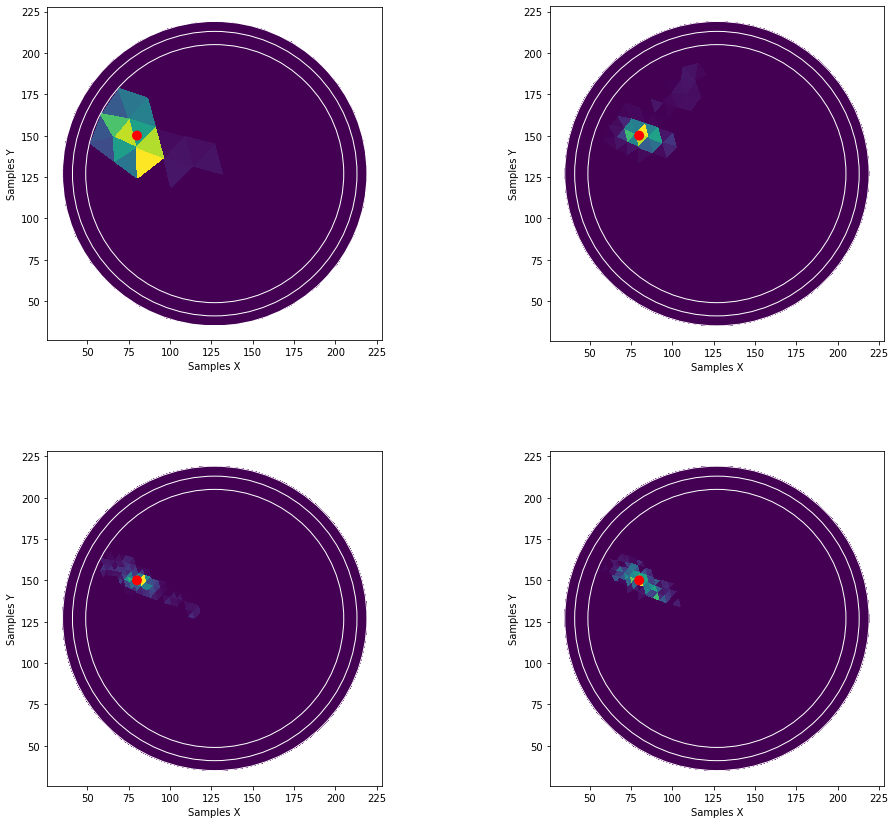

In [214]:
path_meshs = [
        "data/mesh_1.msh",
        "data/mesh_2.msh",
        "data/mesh_3.msh"]

def get_midpoints(mesh):
        nodes = mesh.points
        cells = mesh.cells_dict['triangle']
        centers = np.zeros((len(cells),2))
        for i in range(len(cells)):
                cell = cells[i]
                a = nodes[cell[0]]
                b = nodes[cell[1]]
                c = nodes[cell[2]]
                x = (a[0]+b[0]+c[0])/3
                y = (a[1]+b[1]+c[1])/3
                centers[i] = [x,y]
        return centers

def binning(centers,samples):
        bins = np.zeros(len(centers))
        samples = np.transpose(samples)
        for s in samples:
                bins[utility_functions.find_next_node(centers,s)] += 1
        return bins

def draw_cells(mesh_path, samples, ax):
        mesh = meshio.read(mesh_path)
        centers = get_midpoints(mesh)
        bins = binning(centers,samples)
        ax.tripcolor(mesh.points[:,0], mesh.points[:,1], triangles=mesh.cells_dict['triangle'], facecolors=binning(centers,samples))

def draw_densities(samples, axis):
        az.plot_dist(np.concatenate([samples[0,start:],np.array([35.,219.])]),
            np.concatenate([samples[1,start:],np.array([35.,219.])]),
            textsize=18, ax=axis)

def set_ax(axis, point):
        for r in [78,86,92]:
                axis.add_artist(
                        pt.Circle((127,127),r,edgecolor="white",facecolor="none"))
        axis.add_artist(
                pt.Circle(point,3,facecolor="red"))
        axis.set_xlabel('Samples X')
        axis.set_ylabel('Samples Y')
        axis.set_aspect(1)
        return axis

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

draw_cells(path_meshs[0],samples[0][:,start:end],ax[0,0])
draw_cells(path_meshs[1],samples[1][:,start:end],ax[0,1])
draw_cells(path_meshs[2],samples[2][:,start:10000],ax[1,0])
draw_cells(path_meshs[2],mlda_samples[:,start_mlda:end_mlda],ax[1,1])

#point = (80,150)
set_ax(ax[0,0],point)
set_ax(ax[0,1],point)
set_ax(ax[1,0],point)
set_ax(ax[1,1],point)



<AxesSubplot:xlabel='Samples X', ylabel='Samples Y'>

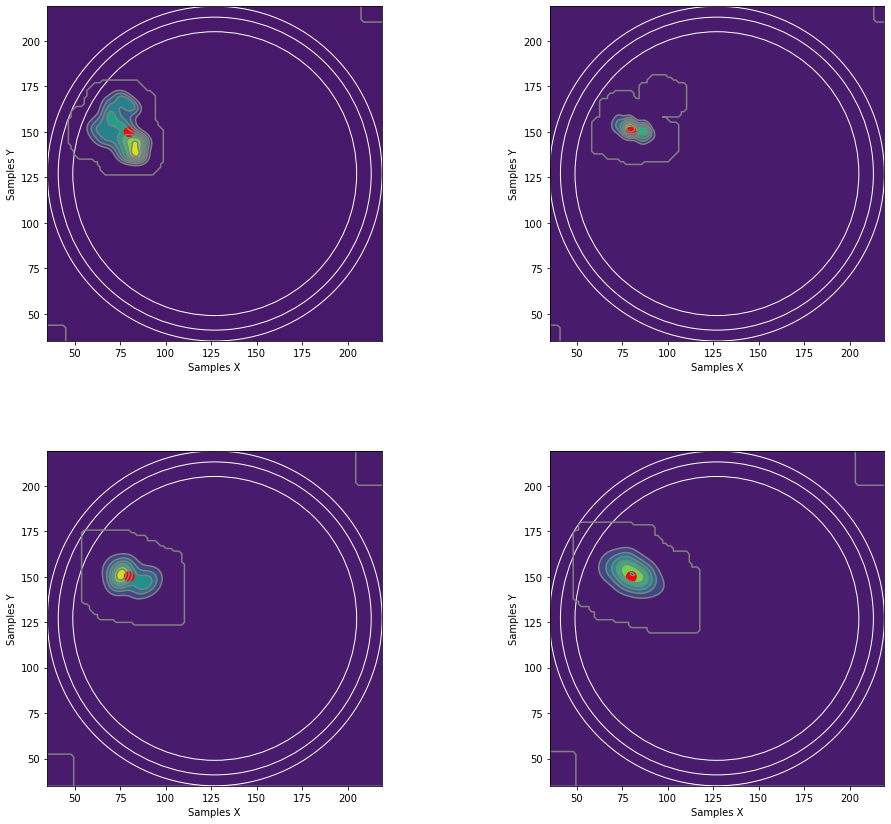

In [220]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

draw_densities(samples[0][:,start:end],ax[0,0])
draw_densities(samples[1][:,start:end],ax[0,1])
draw_densities(samples[2][:,start:end],ax[1,0])
draw_densities(mlda_samples[:,start_mlda:end_mlda],ax[1,1])

#point = (80,150)
set_ax(ax[0,0],point)
set_ax(ax[0,1],point)
set_ax(ax[1,0],point)
set_ax(ax[1,1],point)